# Lending Club Payback Prediction

## Problem Overview

Lending Club is a lending company that connects people who need money (borrowers) with people who have money (investors). As an investor, anyone would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

The problem at hand is to predict the people who have high probablity of paying back the money as comapred to those who dont. Since it is a classification problem, a good way to approach it is by Decision Trees and Random Forest algorithm

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

## Dataset Details

The dataset consists of the following columns:

- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise
- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other")
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates
- installment: The monthly installments owed by the borrower if the loan is funded
- log.annual.inc: The natural log of the self-reported annual income of the borrower
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income)
- fico: The FICO credit score of the borrower
- days.with.cr.line: The number of days the borrower has had a credit line
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle)
- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available)
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments)
- no.fully.paid: This is the column that we are trying to predict. We are trying to predict whether or not the loan was fully paid back or not

In [9]:
loans = pd.read_csv('loan_data.csv')

In [10]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [11]:
loans.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
credit.policy        5 non-null int64
purpose              5 non-null object
int.rate             5 non-null float64
installment          5 non-null float64
log.annual.inc       5 non-null float64
dti                  5 non-null float64
fico                 5 non-null int64
days.with.cr.line    5 non-null float64
revol.bal            5 non-null int64
revol.util           5 non-null float64
inq.last.6mths       5 non-null int64
delinq.2yrs          5 non-null int64
pub.rec              5 non-null int64
not.fully.paid       5 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 640.0+ bytes


In [12]:
loans.head().shape

(5, 14)

In [13]:
loans.head().describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.0
mean,1.0,0.121020,337.888000,11.091236,13.694000,701.000000,3975.183333,20879.000000,53.420000,0.400000,0.200000,0.0,0.0
std,0.0,0.017947,291.625932,0.416248,4.213494,27.248853,1267.137358,15424.476085,21.809791,0.547723,0.447214,0.0,0.0
min,1.0,0.100800,102.920000,10.373491,8.100000,667.000000,2699.958333,3511.000000,25.600000,0.000000,0.000000,0.0,0.0
25%,1.0,0.107100,162.340000,11.082143,11.630000,682.000000,2760.000000,4740.000000,39.500000,0.000000,0.000000,0.0,0.0
50%,1.0,0.118900,228.220000,11.299732,14.290000,707.000000,4066.000000,28854.000000,52.100000,0.000000,0.000000,0.0,0.0
75%,1.0,0.135700,366.860000,11.350407,14.970000,712.000000,4710.000000,33623.000000,73.200000,1.000000,0.000000,0.0,0.0
max,1.0,0.142600,829.100000,11.350407,19.480000,737.000000,5639.958333,33667.000000,76.700000,1.000000,1.000000,0.0,0.0


## Exploratory Data Analysis

#### Creating a histogram to analyse the credit policy outcome for each borrower on the basis of the FICO score

Text(0.5, 0, 'FICO')

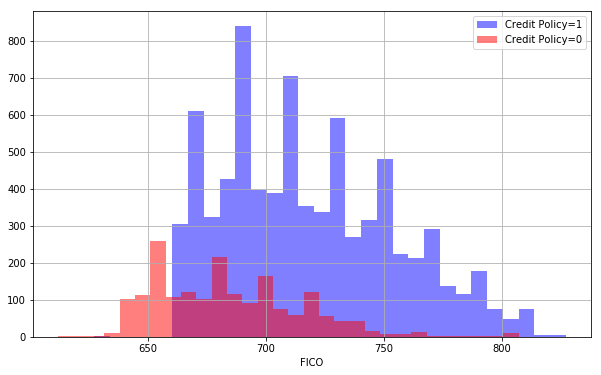

In [21]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit Policy=0')
plt.legend()
plt.xlabel('FICO')

The above graph shows that people with a good FICO score matched more to the lending club credit policy as compared to the people with lesser credit scores

#### Creating a histogram to analyse the not fully paid column for each borrower on the basis of the FICO score

Text(0.5, 0, 'FICO')

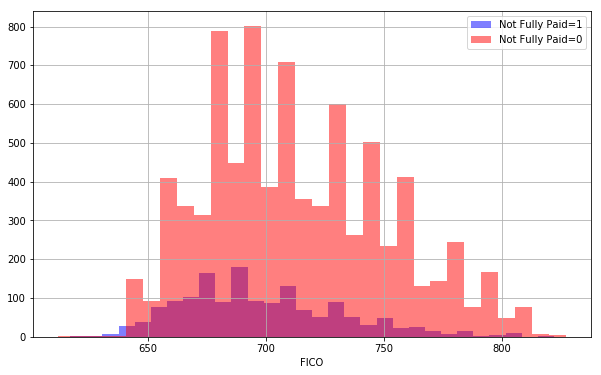

In [23]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Not Fully Paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Not Fully Paid=0')
plt.legend()
plt.xlabel('FICO')

The above graph shows that ratio of people having paid back the money is better with people having a good FICO score as compared to the peopl having not a good FICO score

#### Creating a countplot to visualize the counts of loan purpose on the basis of full payments made or not (not.fully.paid)

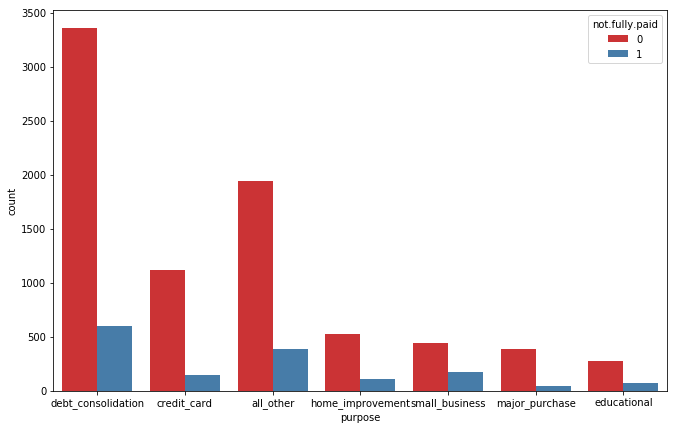

In [26]:
plt.figure(figsize=(11,7))
sns.countplot('purpose',hue='not.fully.paid',data=loans,palette='Set1')

The above graph shows that the ratio of the people who paid back the money fully as to those who did not is almost the same in every loan purpose category

#### Creating a jointplot to visualize the trend between FICO score and interest rate

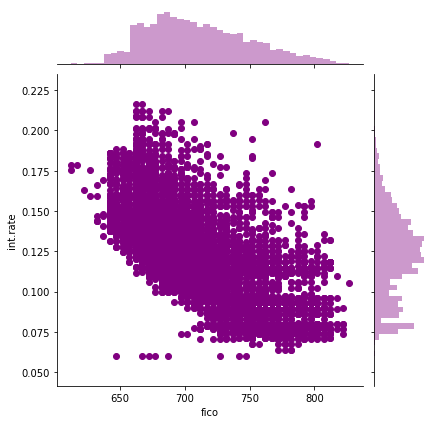

In [31]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

The above graph shows that the as the FICO score goes on increasing, the rate of interest for the borrowers go on decreasing because FICO score gives the investors a sense of confidence that the loan will be repaid by the borrowers

#### Creating a lmplot to visualize the trend between FICO score and interest rate on the basis of credit policy

<Figure size 792x504 with 0 Axes>

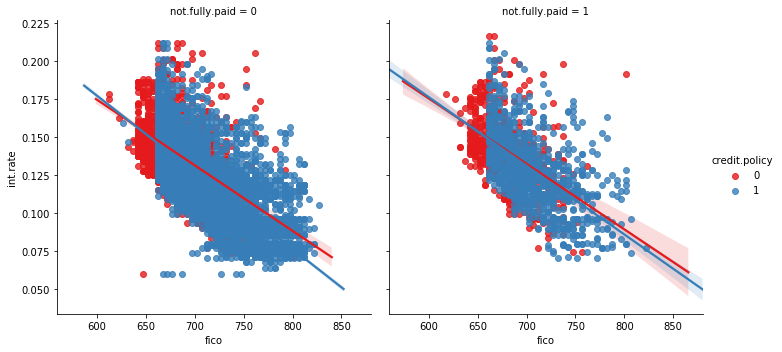

In [35]:
plt.figure(figsize=(11,7))
sns.lmplot(x='fico',y='int.rate',data=loans,hue='credit.policy',col='not.fully.paid',palette='Set1')

## Coverting Categorical Features

The purpose column in the loans dataset has categorical values as it tells about the purpose for the loan. So the column needs to be converted to dummy variable using pandas so that purpose can be used as an input in our machine learning model

In [36]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [50]:
loan_purpose=['purpose']

In [51]:
final_data=pd.get_dummies(loans,columns=loan_purpose,drop_first=True)

In [52]:
# In the above code, drop_first is done to avoid multi-colinearity

In [39]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [55]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Dividing the Data into Features and Labels

We will train out model on the training set and then use the test set to evaluate the model.

In [56]:
X = final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']

## Train Test Split

- Once the features and the labels are decided, the data is to be divided into training data and testing data
- The model will be trained on the training set and then the test set will be used to evaluate the model

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Decision Tree

### Creating and Training a Decision Tree Model

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
# Instantiating Decision Tree model (basically creating a decision tree object)

In [60]:
dtree = DecisionTreeClassifier()

In [63]:
# Training or fitting the model on training data

In [61]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predictions

In [64]:
dtree_predictions = dtree.predict(X_test)

### Decision Tree Model Evaluation

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
print(classification_report(y_test,dtree_predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.24      0.21       443

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [68]:
print(confusion_matrix(y_test,dtree_predictions))

[[1987  444]
 [ 337  106]]


## Random Forest

### Creating and Training a Random Forest Model

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
# Instantiating Random Forest model (basically creating a random forest object)

In [70]:
rfc = RandomForestClassifier(n_estimators=300)

In [76]:
# Training or fitting the model on training data

In [71]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Predictions

In [72]:
rfc_predictions = rfc.predict(X_test)

## Random Forest Model Evaluation

In [73]:
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.56      0.02      0.04       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.71      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [74]:
print(confusion_matrix(y_test,rfc_predictions))

[[2424    7]
 [ 434    9]]


## Conclusion

The Random Forest Model performed slightly better than the Decision Tree Model